<a href="https://colab.research.google.com/github/22aysh/DataScienceWinterProject-2023/blob/main/Calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as StandardScalar
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')


In [3]:
data_calories = pd.read_csv('/content/calories.csv')
data_exercise = pd.read_csv('/content/exercise.csv')

print(data_calories.head())
print(data_exercise.head())
concat_data = pd.concat([data_calories, data_exercise],ignore_index=True)
print(concat_data)


    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
        User_ID  Calories  Gender   Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0     NaN   NaN     NaN     NaN       NaN         NaN   
1      14861698      66.0     NaN   NaN     NaN     NaN       NaN         NaN   
2      11179863      26.0     NaN   NaN     NaN     NaN       NaN         NaN   
3      16180408      71.0     NaN   NaN     NaN     NaN       NaN         NaN   
4      17771927    

In [4]:
data_merge= pd.merge(data_calories,data_exercise, how='outer')
print(data_merge)

        User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.0  female   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  15644082      45.0  female   20   193.0    86.0      11.0        92.0   
14996  17212577      23.0  female   27   165.0    65.0       6.0        85.0   
14997  17271188      75.0  female   43   159.0    58.0      16.0        90.0   
14998  18643037      11.0    male   78   193.0    97.0       2.0        84.0   
14999  11751526      98.0    male   63   173.0    79.0      18.0        92.0   

       Body_Temp  
0           40.8  
1

In [5]:
data_merge.shape

(15000, 9)

In [6]:
data_merge.info

<bound method DataFrame.info of         User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0      14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1      14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2      11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3      16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4      17771927      35.0  female   27   154.0    58.0      10.0        81.0   
...         ...       ...     ...  ...     ...     ...       ...         ...   
14995  15644082      45.0  female   20   193.0    86.0      11.0        92.0   
14996  17212577      23.0  female   27   165.0    65.0       6.0        85.0   
14997  17271188      75.0  female   43   159.0    58.0      16.0        90.0   
14998  18643037      11.0    male   78   193.0    97.0       2.0        84.0   
14999  11751526      98.0    male   63   173.0    79.0      18.0        92.0   

       Body_Temp  
0           40.8  
1           40.3  
2           38.7  
3           40.5  
4           39.8  
...          ...  
14995       40.4  
14996       39.2  
14997       40.1  
14998       38.3  
14999       40.5  

[15000 rows x 9 columns]>

In [7]:
data_merge.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


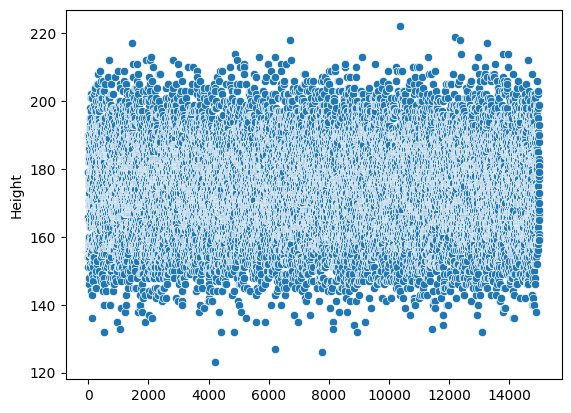

In [11]:
sb.scatterplot(data_merge['Height'])
plt.show()

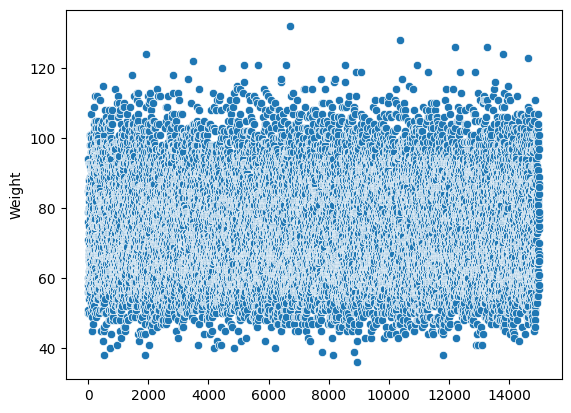

In [12]:
sb.scatterplot(data_merge['Weight'])
plt.show()

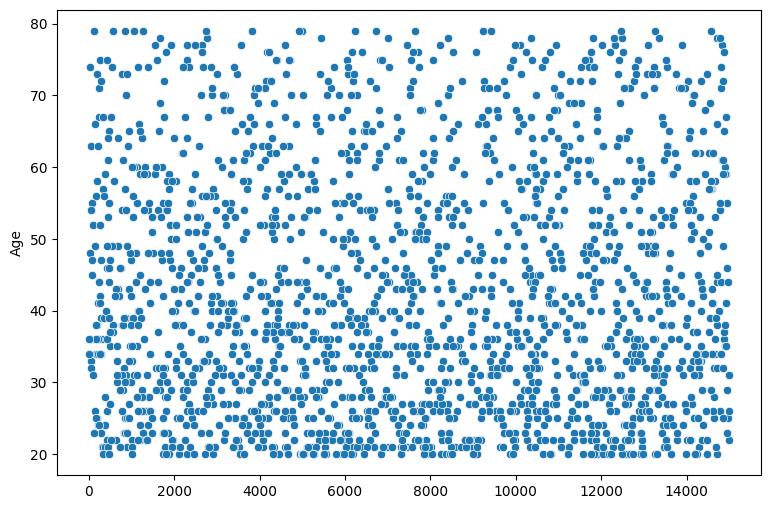

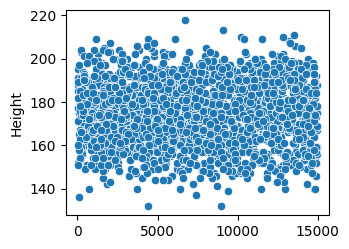

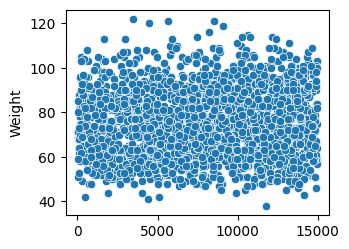

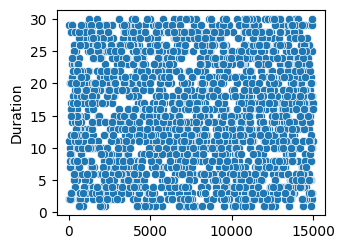

In [17]:
features=['Age','Height','Weight','Duration']
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    x=data_merge.sample(2000)
    sb.scatterplot(x[col])
    plt.tight_layout()
    plt.show()

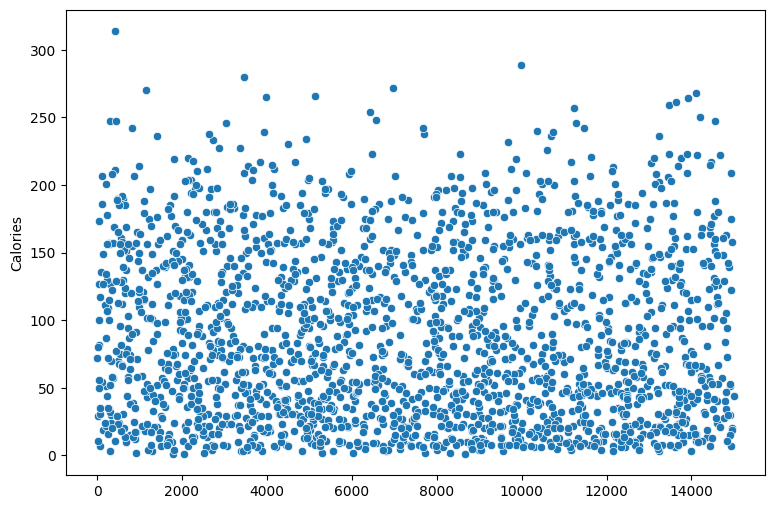

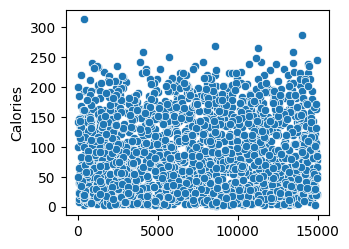

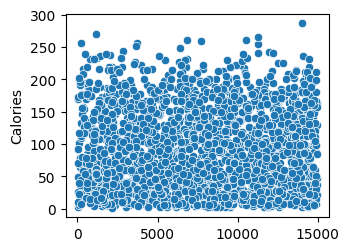

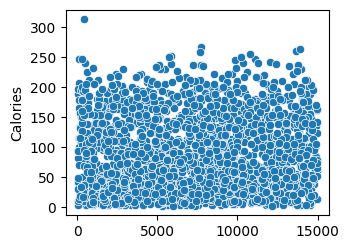

In [19]:
features=['Age','Height','Weight','Duration']
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    x=data_merge.sample(2000)
    sb.scatterplot(x['Calories'])
    plt.tight_layout()
    plt.show()

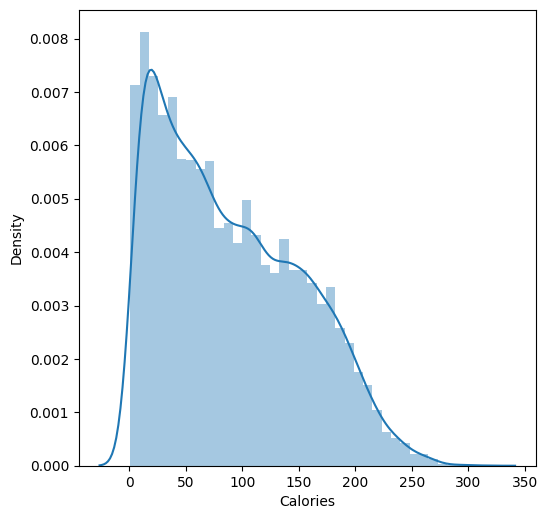

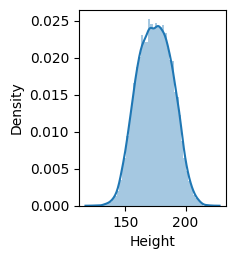

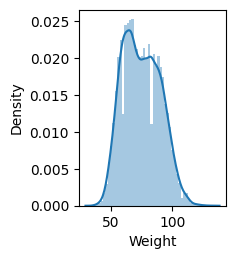

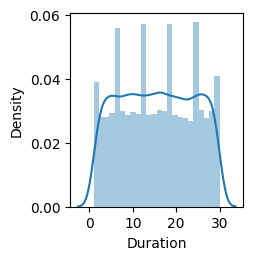

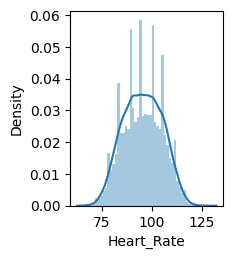

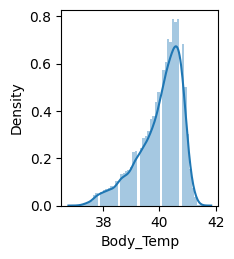

In [23]:
features = data_merge.select_dtypes(include='float').columns

plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(data_merge[col])
    plt.tight_layout()
    plt.show()

In [24]:
data_merge.replace({'male':0,'female':1},
                   inplace=True)
data_merge.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


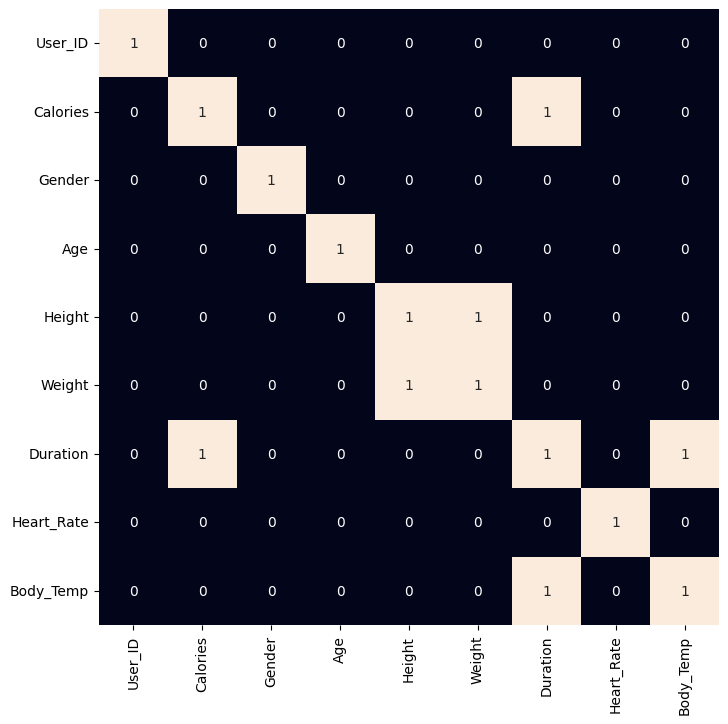

In [25]:
plt.figure(figsize=(8,8))
sb.heatmap(data_merge.corr()>0.9,
           annot=True,
           cbar=False)
plt.show()

In [28]:
to_remove=['Weight','Duration']
data_merge.drop(to_remove,axis=1,inplace=True)


In [32]:
features = data_merge.drop(['User_ID','Calories'], axis=1)
target = data_merge['Calories'].values

X_train, X_val,\
Y_train, Y_val = train_test_split(features,target,
                                test_size=0.1,
                                random_state=22)
X_train.shape ,X_val.shape

((13500, 5), (1500, 5))